In [216]:
#setting up the drive

from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [217]:
import pandas as pd

a_dt = pd.read_csv('/content/gdrive/My Drive/amazon_reviews.csv') #reading the file
a_dt

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


# **EDA & DATA CLEANING**

In [218]:
a_dt.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [219]:
a_dt.shape #to see the number of columns and rows

(4915, 12)

*4915 rows and 12 columns make up the dataset.*

In [220]:
a_dt.columns #for accessing the columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [221]:
a_dt.dtypes #to see the data types of the data present

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [222]:
a_dt.isna().sum() #to check for Naan values

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

*Two columns have Naan values*

In [223]:
a_dt.dropna(subset=['reviewText'], inplace=True)
a_dt.isna().sum() #reviewing again whether the Naan value is removed

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

*Here we are just removing the Naan value in the 'reviewText' column as we will be focusing on that column mainly for sentiment analysis*

In [224]:
a_dt.isnull().sum() #checking for null values

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

*Just one column has null value, but as its in the user name we are ignoring it*

<Axes: ylabel='Frequency'>

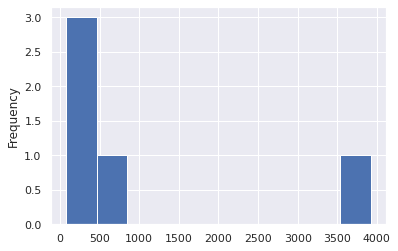

In [225]:
a_dt.overall.value_counts().plot(kind="hist")

In [226]:
#Three categories will be established for reviews: Positive (4-5), Negative (1-2), and Neutral.(3)
import numpy as np

a_dt["Sentiment"] = pd.cut(x=a_dt["overall"],bins=[0, 2, 3,np.inf],labels=["Negative", "Neutral", "Positive"])

<Axes: >

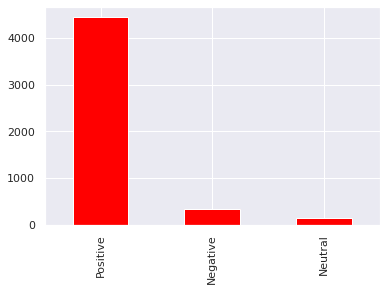

In [227]:
a_dt.Sentiment.value_counts().plot(kind="bar", color = "red")

**Removing Stop words and punctuations from the column**

In [228]:
import string
def punctuation_remover(column): #function to remove punctuations
    return column.translate(str.maketrans('', '', string.punctuation))

a_dt['reviewText'] = a_dt['reviewText'].apply(punctuation_remover) #applying the function to the column to remove the punctuations
a_dt

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Sentiment
0,0,NaN,4.0,No issues,2014-07-23,138,0,0,0,0,0.0,0.0,Positive
1,1,0mie,5.0,Purchased this for my device it worked as adve...,2013-10-25,409,0,0,0,0,0.0,0.0,Positive
2,2,1K3,4.0,it works as expected I should have sprung for ...,2012-12-23,715,0,0,0,0,0.0,0.0,Positive
3,3,1m2,5.0,This think has worked out greatHad a diff bran...,2013-11-21,382,0,0,0,0,0.0,0.0,Positive
4,4,2&amp;1/2Men,5.0,Bought it with Retail Packaging arrived legit ...,2013-07-13,513,0,0,0,0,0.0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0,Negative
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,Positive
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable It c...,2014-03-31,252,0,0,0,0,0.0,0.0,Positive
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,Positive


*When the current output and the previous output are compared, we could notice that the punctuations are removed.*

In [229]:
import nltk
nltk.download('stopwords')

stop_phrases = set(stopwords.words('english')) #function to remove default stop words

def stopword_remover(phrase):
    words = [word for word in phrase.split() if word.lower() not in stop_phrases] #applying the function to our column
    return " ".join(words)

a_dt['reviewText'] = a_dt['reviewText'].apply(stopword_remover)
a_dt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Sentiment
0,0,NaN,4.0,issues,2014-07-23,138,0,0,0,0,0.0,0.0,Positive
1,1,0mie,5.0,Purchased device worked advertised never much ...,2013-10-25,409,0,0,0,0,0.0,0.0,Positive
2,2,1K3,4.0,works expected sprung higher capacity think ma...,2012-12-23,715,0,0,0,0,0.0,0.0,Positive
3,3,1m2,5.0,think worked greatHad diff bran 64gb card went...,2013-11-21,382,0,0,0,0,0.0,0.0,Positive
4,4,2&amp;1/2Men,5.0,Bought Retail Packaging arrived legit orange e...,2013-07-13,513,0,0,0,0,0.0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,bought Sandisk 16GB Class 10 use HTC Inspire 3...,2013-07-23,503,0,0,0,0,0.0,0.0,Negative
4911,4911,Zo,5.0,Used extending capabilities Samsung Galaxy Not...,2013-08-22,473,0,0,0,0,0.0,0.0,Positive
4912,4912,Z S Liske,5.0,Great card fast reliable comes optional adapte...,2014-03-31,252,0,0,0,0,0.0,0.0,Positive
4913,4913,Z Taylor,5.0,Good amount space stuff want fits GoPro say,2013-09-16,448,0,0,0,0,0.0,0.0,Positive


*The default stop words are removed from column*

**Feature Extraction**

In [230]:
#Using the bag-of-words (BoW) model for feature extraction

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

vectorizing_counts = CountVectorizer() # Initialize the object CountVectorizer.

vectorizing_counts.fit(a_dt['reviewText']) # Fit the CountVectorizer object to the text data.
txt_no = vectorizing_counts.transform(a_dt['reviewText'])

In [231]:
txt_no

<4914x11018 sparse matrix of type '<class 'numpy.int64'>'
	with 112970 stored elements in Compressed Sparse Row format>

*The collection has 180641 distinct words in total.*

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector_tfidf = TfidfVectorizer() #Create the TfidfVectorizer object 

vector_tfidf.fit(a_dt['reviewText']) #Using the TfidfVectorizer object, fit and convert the text data.
txt_tfidf = vector_tfidf.transform(a_dt['reviewText'])

In [233]:
txt_tfidf.shape #normalized word count

(4914, 11018)

**Data split and creating the model to train**

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

x_train,x_test, y_train, y_test = train_test_split(txt_no,a_dt['Sentiment'], test_size =0.25, random_state=5)

x_train_array = np.asarray(x_train.todense())
y_train_array = np.asarray(y_train)

In [235]:
y_test_coded = []
for i in y_test:
    if i=="Positive":
        y_test_coded.append(1)
    else:
        y_test_coded.append(0)

In [236]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Build a Gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(x_train_array, y_train_array)

print("Matrix")
matrix = confusion_matrix(y_test, GNB_classifier.predict(np.asarray(x_test.todense())))
print(matrix)

print("\nReport")
report = classification_report(y_test, GNB_classifier.predict(np.asarray(x_test.todense())))
print(report)

accuracy = accuracy_score(y_test, GNB_classifier.predict(np.asarray(x_test.todense())))
print('GNB Classifier Accuracy: {:.2f}%'.format(accuracy*100))

Matrix
[[ 20   4  53]
 [  8   3  25]
 [237  96 783]]

Report
              precision    recall  f1-score   support

    Negative       0.08      0.26      0.12        77
     Neutral       0.03      0.08      0.04        36
    Positive       0.91      0.70      0.79      1116

    accuracy                           0.66      1229
   macro avg       0.34      0.35      0.32      1229
weighted avg       0.83      0.66      0.73      1229

GNB Classifier Accuracy: 65.58%


In [237]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(x_train_array, y_train_array)

print("Matrix")
matrix = confusion_matrix(y_test, LogReg.predict(np.asarray(x_test.todense())))
print(matrix)

print("\nReport")
report = classification_report(y_test, LogReg.predict(np.asarray(x_test.todense())))
print(report)

accuracy = accuracy_score(y_test, LogReg.predict(np.asarray(x_test.todense())))
print('Logistic Regression Accuracy: {:.2f}%'.format(accuracy*100))

Matrix
[[  46    4   27]
 [   7    3   26]
 [  12    4 1100]]

Report
              precision    recall  f1-score   support

    Negative       0.71      0.60      0.65        77
     Neutral       0.27      0.08      0.13        36
    Positive       0.95      0.99      0.97      1116

    accuracy                           0.93      1229
   macro avg       0.64      0.56      0.58      1229
weighted avg       0.92      0.93      0.92      1229

Logistic Regression Accuracy: 93.49%


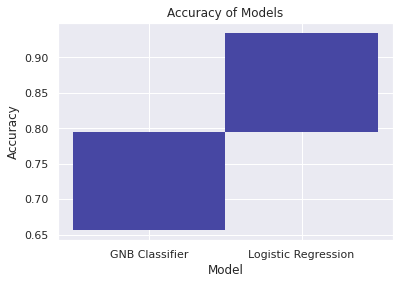

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

# List the accuracy scores of both models
scores = [accuracy_score(y_test, GNB_classifier.predict(np.asarray(x_test.todense()))), 
          accuracy_score(y_test, LogReg.predict(np.asarray(x_test.todense())))]

# Create a line plot of the scores using Seaborn
sns.histplot(x=['GNB Classifier', 'Logistic Regression'], y=scores, color='blue')

# Set the title and labels
plt.title("Accuracy of Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")

# Show the plot
plt.show()


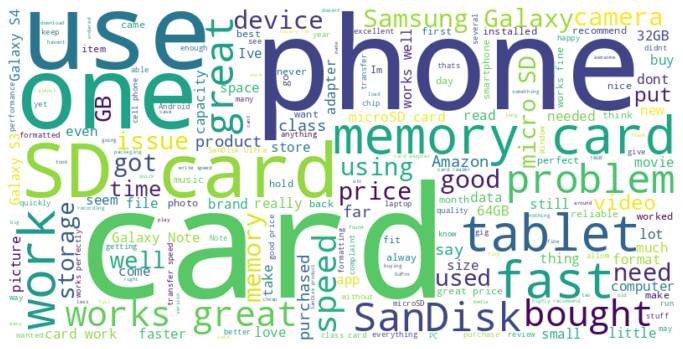

In [239]:
from wordcloud import WordCloud

# Select only the positive reviews
positive_reviews = a_dt[a_dt['Sentiment'] == 'Positive']

# Combine all the positive reviews into a single string
text = ' '.join(positive_reviews['reviewText'].tolist())

# Generate the word cloud
wordcloud = WordCloud(background_color='white', colormap='viridis', width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

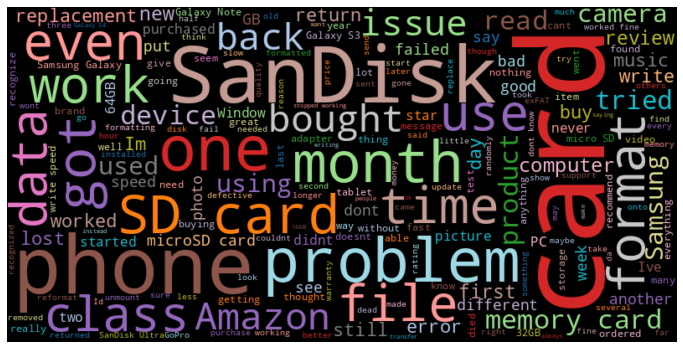

In [240]:
# Select only the negative reviews
positive_reviews = a_dt[a_dt['Sentiment'] == 'Negative']

# Combine all the positive reviews into a single string
text = ' '.join(positive_reviews['reviewText'].tolist())

# Generate the word cloud
wordcloud = WordCloud(background_color='black', colormap='tab20', width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

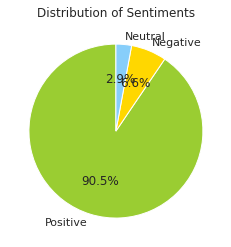

In [241]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each sentiment
counts = a_dt['Sentiment'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, colors=['yellowgreen', 'gold', 'lightskyblue'], autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Distribution of Sentiments")

# Show the plot
plt.show()